In [1]:
!pip install pyomo

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear regression model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<IPython.core.display.Javascript object>

In [20]:
df = pd.read_csv("KickStarterProjects.csv")

<IPython.core.display.Javascript object>

In [21]:
df.shape

(378661, 14)

<IPython.core.display.Javascript object>

In [22]:
data = df.copy()

<IPython.core.display.Javascript object>

In [23]:
data.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

In [24]:
data.tail()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,17-10-2014,50000.0,17-09-2014 02:35,25.0,canceled,1,US,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,19-07-2011,1500.0,22-06-2011 03:35,155.0,failed,5,US,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,16-08-2010,15000.0,01-07-2010 19:40,20.0,failed,1,US,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,13-02-2016,15000.0,13-01-2016 18:13,200.0,failed,6,US,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,16-08-2011,2000.0,19-07-2011 09:07,524.0,failed,17,US,524.0,2000.0


<IPython.core.display.Javascript object>

In [25]:
print(data.columns)

Index(['ID', 'name', 'subcategory', 'category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


<IPython.core.display.Javascript object>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   subcategory       378661 non-null  object 
 3   category          378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 40.4+ MB


<IPython.core.display.Javascript object>

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,538263516.0,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2000.0,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,30.0,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.0,1.200000e+01,5.600000e+01,2.193820e+05
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,31.0,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2000.0,5.500000e+03,1.550000e+04,1.663614e+08


<IPython.core.display.Javascript object>

In [29]:
data.drop(["currency", "goal"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [30]:
data.shape

(378661, 12)

<IPython.core.display.Javascript object>

In [16]:
data.head()

,ID,name,subcategory,category,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

In [31]:
data.isnull().sum()

ID                  0
name                4
subcategory         0
category            0
deadline            0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

<IPython.core.display.Javascript object>

In [32]:
data.dropna(inplace=True)
data.shape

(378657, 12)

<IPython.core.display.Javascript object>

In [33]:
data.head()

,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,09-10-2015,11-08-2015 12:12,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,01-11-2017,02-09-2017 04:43,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,26-02-2013,12-01-2013 00:20,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,16-04-2012,17-03-2012 03:24,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,29-08-2015,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,19500.00


<IPython.core.display.Javascript object>

In [34]:
df.sample(10)

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
68624,1349286638,Tap2Talk,Apps,Technology,USD,11-01-2015,350.0,05-12-2014 00:20,117.00,failed,5,US,117.00,350.00
118347,1601284053,Brick Road Magazine needs your help to print o...,Periodicals,Publishing,USD,21-04-2012,6000.0,21-03-2012 11:36,361.00,failed,10,US,361.00,6000.00
32088,1163141797,Amerasiano,Nonfiction,Publishing,USD,15-02-2012,9000.0,17-12-2011 02:22,306.00,failed,10,US,306.00,9000.00
192621,1980213492,"Locate a chat, Plant a chatroom at any locatio...",Technology,Technology,USD,06-03-2017,40000.0,06-02-2017 17:21,0.00,canceled,0,US,0.00,40000.00
38954,1197853336,Disreality web series,Webseries,Film & Video,USD,26-07-2011,5000.0,08-06-2011 22:26,301.00,failed,4,US,301.00,5000.00
136916,1695292035,Zombie 15',Tabletop Games,Games,USD,14-02-2014,35000.0,15-01-2014 00:15,141203.00,successful,1980,US,141203.00,35000.00
128754,1653747606,Get Our Space Shuttle Movie Into Classrooms!,Narrative Film,Film & Video,USD,30-06-2012,39000.0,31-05-2012 17:44,10512.01,failed,110,US,10512.01,39000.00
87181,1443204865,The Hiccup Monster,Children's Books,Publishing,CAD,11-04-2015,1000.0,11-03-2015 19:53,1042.00,successful,24,CA,854.73,820.28
238335,281864352,Running Still,Shorts,Film & Video,USD,01-10-2012,4246.0,19-09-2012 21:26,4318.00,successful,64,US,4318.00,4246.00
305942,627924481,Hardcore Luchador – Let's Print Issue 2!,Comic Books,Comics,USD,26-05-2014,3300.0,17-04-2014 12:48,4705.00,successful,89,US,4705.00,3300.00


<IPython.core.display.Javascript object>

In [35]:
df["state"].head()

0      failed
1      failed
2      failed
3      failed
4    canceled
Name: state, dtype: object

<IPython.core.display.Javascript object>

In [37]:
pd.unique(df["state"])

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

<IPython.core.display.Javascript object>

In [40]:
arr = ["failed", "canceled", "successful", "live", "undefined", "suspended"]
arr[0]

'failed'

<IPython.core.display.Javascript object>

In [58]:
cols = ["failed", "canceled", "successful", "live", "undefined", "suspended"]
dict_cols = {"failed":0, "canceled":0, "successful":0, "live":0, "undefined":0, "suspended":0}
for colname in df["state"]:  # only need to consider string columns
    dict_cols[colname] = dict_cols[colname] + 1 


{'failed': 0, 'canceled': 0, 'successful': 0, 'live': 0, 'undefined': 0, 'suspended': 0}


<IPython.core.display.Javascript object>

In [59]:
print(dict_cols)

{'failed': 197719, 'canceled': 38779, 'successful': 133956, 'live': 2799, 'undefined': 3562, 'suspended': 1846}


<IPython.core.display.Javascript object>

In [60]:
dict_cols.values()

dict_values([197719, 38779, 133956, 2799, 3562, 1846])

<IPython.core.display.Javascript object>

In [61]:
max(dict_cols.values())

197719

<IPython.core.display.Javascript object>

In [63]:
dict_cols.get(197719)

<IPython.core.display.Javascript object>

In [65]:
df["backers"].mean()

105.61747578969052

<IPython.core.display.Javascript object>

In [66]:
df["backers"].median()

12.0

<IPython.core.display.Javascript object>

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<IPython.core.display.Javascript object>

In [82]:
df.sample(10)


,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
247483,328652041,HealthyFace; Finding the least toxic cosmetic ...,Apps,Technology,USD,31-07-2016,30250.0,01-07-2016 18:01,800.00,failed,5,US,800.00,30250.0
262096,403185185,A Playground for the Wild at Heart,Architecture,Design,USD,04-02-2015,5000.0,05-01-2015 22:48,121.00,failed,3,US,121.00,5000.0
172376,1876645152,His Grace Wildlife Photography: Volume I,Nature,Photography,USD,10-10-2015,2000.0,10-09-2015 00:53,1055.00,failed,17,US,1055.00,2000.0
36255,1184023104,The Internet Review of 2016,Periodicals,Publishing,USD,06-01-2017,3500.0,05-12-2016 15:26,14130.55,successful,384,US,14130.55,3500.0
203117,2034313769,Tabletop Gaming Fold-Out Cubby Shelf Table Top...,Tabletop Games,Games,USD,23-12-2013,599.0,03-12-2013 01:23,686.00,successful,23,US,686.00,599.0
148769,1756185274,"Michale Graves ""When Worlds Collide Instrumental""",Punk,Music,USD,13-08-2016,2500.0,05-08-2016 00:03,8451.00,successful,73,US,8451.00,2500.0
320154,700394475,ATTACK Cops vs. Robbers - The Card Game (Cance...,Playing Cards,Games,USD,02-06-2016,10000.0,03-05-2016 08:01,100.00,canceled,4,US,100.00,10000.0
254159,362392499,Solar Home Heater,Technology,Technology,USD,15-02-2015,15000.0,16-01-2015 00:10,512.00,failed,4,US,512.00,15000.0
230216,240249555,The Girl Inside,Horror,Film & Video,USD,31-10-2017,77000.0,26-09-2017 03:14,8965.00,failed,29,US,8965.00,77000.0
364483,927020667,Book Wyrms: DRAGON Playing Cards & Field Guide,Playing Cards,Games,USD,14-07-2016,3000.0,22-06-2016 17:56,12671.00,successful,250,US,12671.00,3000.0


<IPython.core.display.Javascript object>

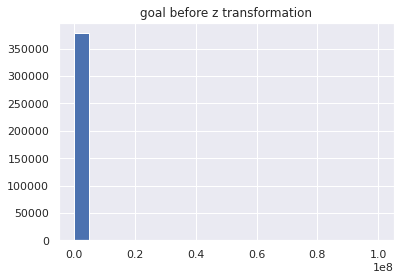

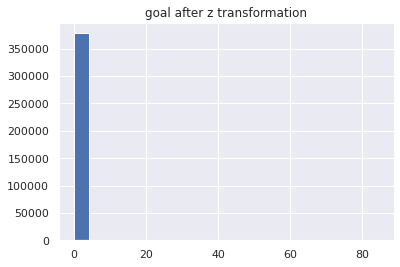

<IPython.core.display.Javascript object>

In [83]:
std_scaler = StandardScaler()

df["goal"].hist(bins=20)
plt.title("goal before z transformation")
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column
# DataFrame rather than a Series, like if I did df['Weight']


df["goal_scaled"] = std_scaler.fit_transform(df[["goal"]])
df["goal_scaled"].hist(bins=20)
plt.title("goal after z transformation")
plt.show()
# exact same shape since it's a linear transformation.
# df.drop(['Weight'], axis=1, inplace=True)

In [84]:
df["launched"] = pd.to_datetime(df["launched"])
# df['Joined year'] = df['Joined'].dt.year  # adding in a feature that's just the year
# print(min(df['Joined']), max(df['Joined']))
# df['Joined'].head()

<IPython.core.display.Javascript object>

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   subcategory       378661 non-null  object        
 3   category          378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  object        
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd_pledged_real  378661 non-null  float64       
 13  usd_goal_real     378661 non-null  float64       
 14  goal

<IPython.core.display.Javascript object>

In [88]:
df['launched_month'] = df['launched'].dt.month  # adding in a feature that's just the year


<IPython.core.display.Javascript object>

In [92]:
df["launched_month"].sample(10)

271158     7
243235     3
320182     5
196950     1
159334     1
45076      7
278076     6
108631     2
125095    12
358843     8
Name: launched_month, dtype: int64

<IPython.core.display.Javascript object>

In [93]:
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
dict_cols = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}
for colname in df["launched_month"]:  # only need to consider string columns
    dict_cols[colname] = dict_cols[colname] + 1

<IPython.core.display.Javascript object>

In [94]:
dict_cols

{1: 34347,
 2: 29876,
 3: 32837,
 4: 31038,
 5: 31573,
 6: 31383,
 7: 34477,
 8: 31619,
 9: 31538,
 10: 33409,
 11: 32135,
 12: 24429}

<IPython.core.display.Javascript object>

In [95]:
max(dict_cols.values())

34477

<IPython.core.display.Javascript object>

In [97]:
arr = pd.unique(df["category"])

<IPython.core.display.Javascript object>

In [98]:
arr

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

<IPython.core.display.Javascript object>

In [103]:
dict_cols = {'Publishing':0, 'Film & Video':0, 'Music':0, 'Food':0, 'Design':0, 'Crafts':0,
       'Games':0, 'Comics':0, 'Fashion':0, 'Theater':0, 'Art':0, 'Photography':0,
       'Technology':0, 'Dance':0, 'Journalism':0}


<IPython.core.display.Javascript object>

In [107]:
df["category"].sample(1)

297019    Fashion
Name: category, dtype: object

<IPython.core.display.Javascript object>

In [108]:
df["name"]

0                           The Songs of Adelaide & Abullah
1             Greeting From Earth: ZGAC Arts Capsule For ET
2                                            Where is Hank?
3         ToshiCapital Rekordz Needs Help to Complete Album
4         Community Film Project: The Art of Neighborhoo...
                                ...                        
378656    ChknTruk Nationwide Charity Drive 2014 (Canceled)
378657                                            The Tribe
378658    Walls of Remedy- New lesbian Romantic Comedy f...
378659                             BioDefense Education Kit
378660                    Nou Renmen Ayiti!  We Love Haiti!
Name: name, Length: 378661, dtype: object

<IPython.core.display.Javascript object>

In [110]:
len(df["name"].unique())

375723

<IPython.core.display.Javascript object>

In [111]:
df.isnull().sum().sort_values(ascending = False)



name                4
ID                  0
subcategory         0
category            0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
goal_scaled         0
launched_month      0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='usd_goal_real', ylabel='Count'>

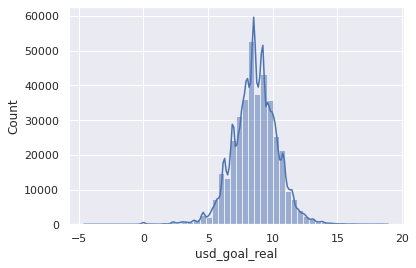

<IPython.core.display.Javascript object>

In [112]:
sns.histplot(np.log(df['usd_goal_real']), bins=50, kde=True)



In [113]:
df.groupby(['category']).mean().sort_values(by='usd_pledged_real', ascending=False)



,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,goal_scaled,launched_month
category,,,,,,,,
Design,1.078300e+09,46733.630260,27119.751279,241.299634,24417.034698,41871.388591,-0.001983,6.537113
Technology,1.071495e+09,119712.316780,22586.164814,164.466609,21151.171165,102288.542838,0.059686,6.532193
Games,1.072129e+09,50711.298323,21865.173174,321.785615,21041.903140,44923.741408,0.001378,6.367801
Comics,1.063611e+09,20243.646297,6899.311189,134.771236,6610.443828,19571.430669,-0.024368,6.191885
Film & Video,1.074967e+09,84334.009667,6362.733853,66.015208,6157.978427,82625.292253,0.029790,6.338586
Fashion,1.069690e+09,24818.246005,6549.031814,61.447800,5712.450839,22412.409361,-0.020503,6.508327
Food,1.081894e+09,48693.745411,5340.163268,54.172466,5113.669716,49039.620802,-0.000327,6.491139
Theater,1.068349e+09,27542.345424,4097.224679,47.057271,4005.918099,27088.321275,-0.018201,6.184459
Music,1.074995e+09,16056.357380,3992.735602,52.168323,3858.367608,15372.161844,-0.027907,6.318156


<IPython.core.display.Javascript object>